In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")  

In [2]:
df = pd.read_excel(r"D:\ExceLR Solution\Assignments\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')

In [3]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.shape 

(908, 13)

In [5]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [6]:
df.columns 

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [7]:
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [8]:
df['sex'].value_counts()

sex
Male      718
Female    190
Name: count, dtype: int64

In [9]:
df['cp'].value_counts() 

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [10]:
df['fbs'].value_counts()

fbs
False    723
True     185
Name: count, dtype: int64

In [11]:
df['exang'].value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [12]:
df['restecg'].value_counts() 

restecg
normal              542
lv hypertrophy      187
st-t abnormality    179
Name: count, dtype: int64

In [13]:
df['exang'] = df['exang'].map({False:False,True:True,'TURE':True,'FALSE':False})

In [14]:
df = df.astype({'fbs':int,'exang':int})

In [15]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalch        int64
exang         int32
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

### Handle Imbalence dataset 

In [16]:
df['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

### Missing Value Detection 

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [18]:
df.isnull().sum() 

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

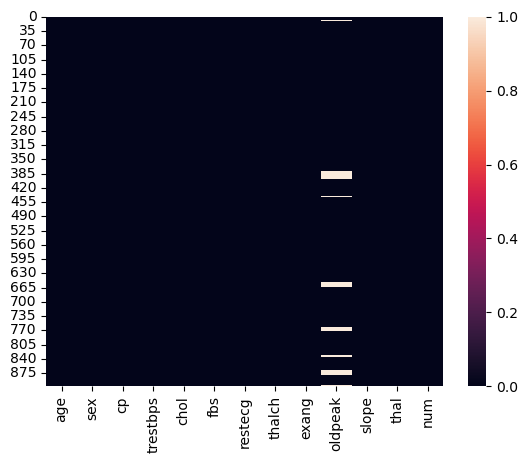

In [19]:
sns.heatmap(df.isnull()) 
plt.show() 

### Mising value Imputation 

In [20]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean()) 

In [21]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### EDA 

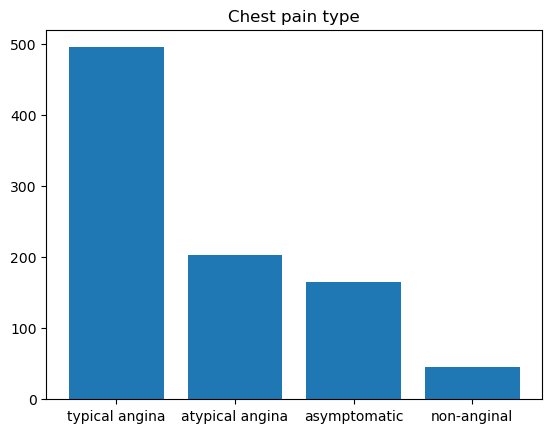

In [22]:
plt.bar(x=df['cp'].unique(),height=list(df['cp'].value_counts())) 
plt.title(label='Chest pain type') 
plt.show() 

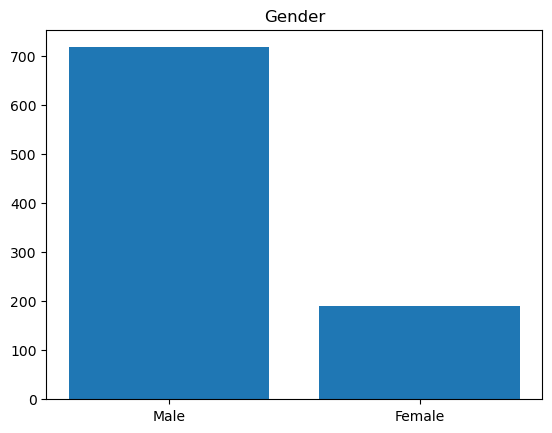

In [23]:
plt.bar(x=df['sex'].unique(),height=list(df['sex'].value_counts())) 
plt.title(label='Gender')  
plt.show() 

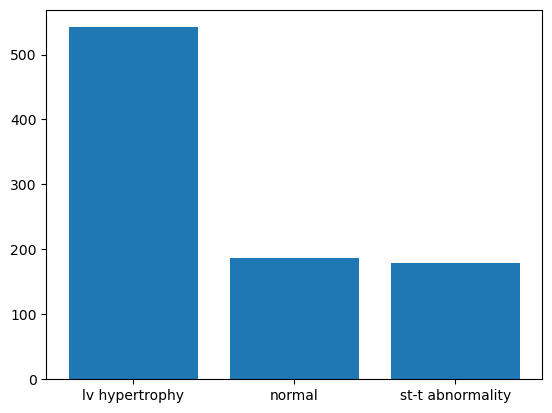

In [24]:
plt.bar(x=df['restecg'].unique(),height=list(df['restecg'].value_counts()))  
plt.show() 

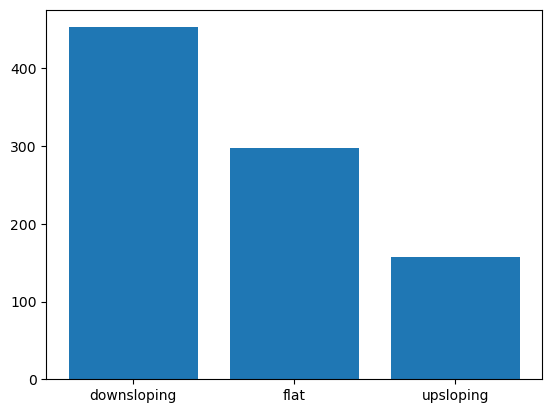

In [25]:
#slope 
plt.bar(x=df['slope'].unique(),height=list(df['slope'].value_counts()))  
plt.show() 

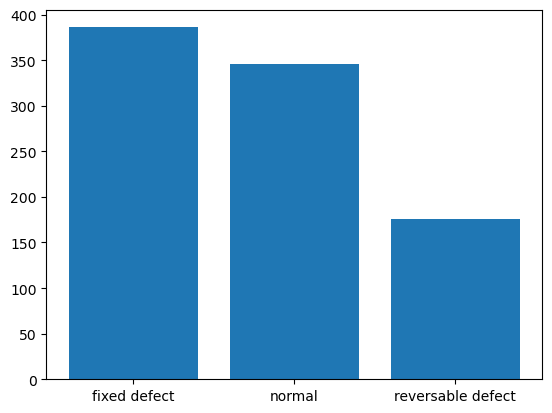

In [26]:
plt.bar(x=df['thal'].unique(),height=list(df['thal'].value_counts()))  
plt.show() 

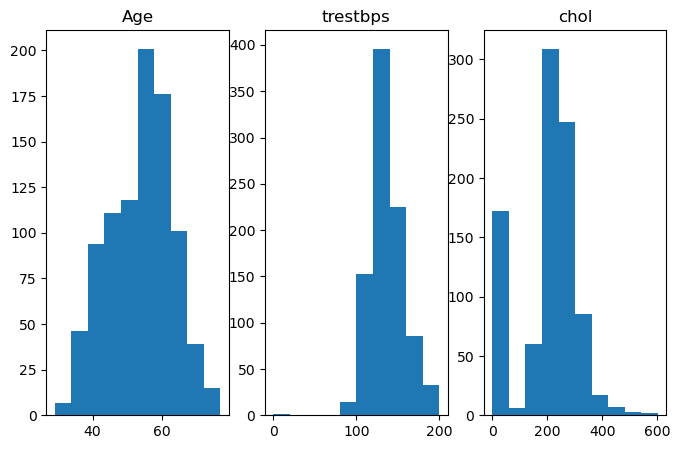

In [27]:
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.hist(df['age'])
plt.title('Age')
plt.subplot(1,3,2)
plt.hist(df['trestbps'])
plt.title('trestbps')
plt.subplot(1,3,3) 
plt.hist(df['chol'])
plt.title('chol')
plt.show()  

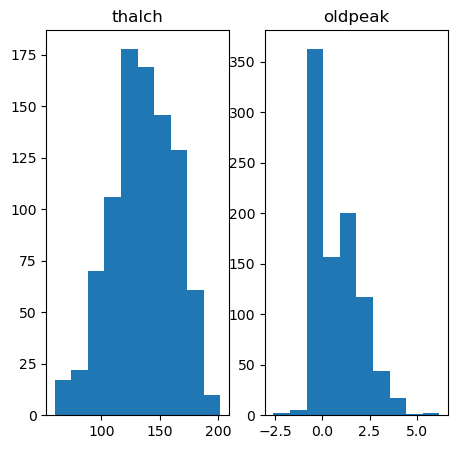

In [28]:
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.hist(df['thalch'])
plt.title('thalch')
plt.subplot(1,3,2)
plt.hist(df['oldpeak'])
plt.title('oldpeak')
plt.show()  

### Data Transformation 

In [29]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.compose import  ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 

In [30]:
x = df.drop('num',axis=1)
y = df[['num']] 

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8,random_state=123)

In [32]:
Num_cols = list(x_train.select_dtypes(exclude='object').columns)
cat_cols = list(x_train.select_dtypes(include='object').columns)

In [33]:
Num_cols

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak']

In [34]:
cat_cols

['sex', 'cp', 'restecg', 'slope', 'thal']

In [35]:
cat_pipe = Pipeline([('encoder',OneHotEncoder())]) 
num_pipe = Pipeline([('scaler',StandardScaler())])  

In [36]:
preprocessor = ColumnTransformer(transformers=[('num_pip',num_pipe,Num_cols),('cat_pip',cat_pipe,cat_cols)]) 

In [37]:
x_train = preprocessor.fit_transform(x_train) 
x_test = preprocessor.transform(x_test)

### Model Building

In [38]:
model = DecisionTreeClassifier()

In [39]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred = model.predict(x_test)

In [41]:
y_train_pred = model.predict(x_train)

### Model Evalution 

In [42]:
from sklearn.metrics import accuracy_score 

In [43]:
print('test_accuracy_score',accuracy_score(y_test,y_pred))

test_accuracy_score 0.47042640990371387


In [44]:
print('train_accuracy_score',accuracy_score(y_train,y_train_pred))

train_accuracy_score 1.0


### Hyperparameter Tuning 

In [45]:
from sklearn.model_selection import RandomizedSearchCV 

In [46]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[6,7,8,9,10,11],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1],
    'min_weight_fraction_leaf':[0.0],
    'max_features':[5,6,7,8,10,11],
    'max_leaf_nodes':[1,2,3],
    'ccp_alpha':[0.0] 
}

In [47]:
model_rcv = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params,cv=5)

In [48]:
model_rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': [0.0],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8, 9, 10, 11],
                                        'max_features': [5, 6, 7, 8, 10, 11],
                                        'max_leaf_nodes': [1, 2, 3],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'min_weight_fraction_leaf': [0.0]})

In [49]:
Y_train_pred = model_rcv.predict(x_train)
Y_test_pred = model_rcv.predict(x_test)

In [50]:
print('Test_Accuracy_Score :',accuracy_score(y_test,Y_test_pred))
print('Train_Accuracy_Score :',accuracy_score(y_train,Y_train_pred))

Test_Accuracy_Score : 0.5226960110041265
Train_Accuracy_Score : 0.6243093922651933


### Interview Questions:

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

--> Decision tree models have several hyperparameters that can significantly impact their performance. Here are some of the most common ones:

* Max Depth: This parameter controls the maximum depth of the tree. Limiting the depth helps prevent overfitting by restricting the model’s complexity. A shallow tree might underfit, while a very deep tree might overfit.

* Min Samples Split: This is the minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns, reducing overfitting.

* Min Samples Leaf: This parameter sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, higher values can help in reducing overfitting by ensuring that leaf nodes have enough samples.

* Max Features: This determines the number of features to consider when looking for the best split. Using fewer features can reduce overfitting and improve generalization, but too few might lead to underfitting.

* Criterion: This parameter defines the function to measure the quality of a split. Common criteria include “gini” for the Gini impurity and “entropy” for information gain. The choice of criterion can affect the splits and, consequently, the model’s performance.


2. What is the difference between the Label encoding and One-hot encoding? 

--> Label encoding and one-hot encoding are two common techniques used to convert categorical data into numerical format for machine learning models. Here’s a breakdown of their differences:

* Label Encoding

   * Definition: Assigns a unique integer to each category.
  * Example: For a column with categories ["Red", "Green", "Blue"], label encoding might assign Red = 0, Green = 1, and Blue = 2.

  * Pros: Simple and efficient for ordinal data where the order matters.

  * Cons: Implies an ordinal relationship between categories, which can mislead algorithms if the data is nominal (no inherent order).
  
* One-Hot Encoding

  * Definition: Creates a new binary column for each category, with a 1 indicating the presence of the category and 0 otherwise.
  * Example: For the same column ["Red", "Green", "Blue"], one-hot encoding would create three columns: Red, Green, and Blue. A row with Green would be represented as [0, 1, 0].

  * Pros: Does not imply any ordinal relationship, making it suitable for nominal data.
  
   * Cons: Can lead to a high-dimensional feature space if the number of categories is large, which might increase computational complexity.
   
* When to Use Each 

  * Label Encoding: Best for ordinal data where the order of categories is meaningful (e.g., ["Low", "Medium", "High"]).
  * One-Hot Encoding: Preferred for nominal data where there is no intrinsic order among categories (e.g., ["Cat", "Dog", "Bird"]).